![example](images/director_shot.jpeg)

# Project Title

**Authors:** Rachel Fein
***

## Overview

This analysis and data modeling was performed with the intent to give recommendations to Microsoft on basic key characteristics their new movie should have to be successful. Success in this analysis is based on net profit (production budget - gross worldwide profit). The investigation used descriptive analysis and dove into the runtime, release month, and production budget of the most successful movies of all time. The investigation led to three recommendations:
- The movie should last approximately 117 to 119 minutes
- The movie should be released in June
- It is expected the higher the production budget the higher the net profit will be. I recommend Microsoft spend around $188,000,000 which is the median production budget of the top 50 movies.   

## Business Problem

Microsoft wants to make a movie that has the highest chances of success. The rate of success will be evaluated by net profit, a formula of subtracting production budget by gross worldwide profit. Specific attributes of 
movies with the highest net profit were analyzed to give Microsoft an understanding of what common qualities the top
producing movies have. 

This analysis produced recommendations on what Microsoft’s movie runtime, release month, and budget should be to help land its movie among the top producing movies of all time. These three aspects were picked to be investigated because 
they have shown to have a great impact on a movie’s success. Finding and choosing these defining characteristics will give Microsoft the best chance at success.


## Data Understanding

The data used for this project was from IMDb and The Numbers (TN), both are a reputable online database of movie information. The data from these sources worked well in my analysis since most movies located in the TN data frame were located in the IMDb data frame, this allowed for the databases to be combined when needed for analysis. The IMDb data frame was called "imdb title basics" it had 5782 rows and 6 columns. The columns were `release date`, `movie`, `production_budget`, `domestic_gross`, `worldwide_gross`. The TN dataframe was called "tn movie budgets" and contained 146144 rows and 4 colums; `primary_title`, `original_title`, `start_year`, `runtime_minutes`, `genres`. In both data frames, each row was a movie title. These two datasets were joined on `movie` and `primary_title`. All columns of the IMDb data frame were used in this analysis. For the TN data frame only the `primary_title` and `runtime_minutes` columns were used.

Although most movies located in the smaller TN data frame were located in the larger IMDb data frame, the IMDb data frame had many more rows, the vast difference of the amount of rows between the two was a limitation for the analysis.


In [1]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Import data needed for analysis after unzipping data using gzip -d filename.gz
df_imdb = pd.read_csv('data/zippedData/imdb.title.basics.csv')
df_tn = pd.read_csv('data/zippedData/tn.movie_budgets.csv')

In [3]:
# Find out what the data file consists of. By using .info we can see where there is missing data and what the data 
# types are.  
df_tn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [4]:
df_tn.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [5]:
# glance at budget
df_tn['production_budget'].describe()

count            5782
unique            509
top       $20,000,000
freq              231
Name: production_budget, dtype: object

In [6]:
# .info shows that there is data missing for runtime_minutes which is one of the features I will be analyzing
# I will need to decide what is most appropriate to do about the null data.
df_imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [7]:
df_imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [8]:
# glance at runtime
df_imdb['runtime_minutes'].describe()

count    114405.000000
mean         86.187247
std         166.360590
min           1.000000
25%          70.000000
50%          87.000000
75%          99.000000
max       51420.000000
Name: runtime_minutes, dtype: float64

In [9]:
# We see that out of 146,144 rows there are only 136,071 unique movie titles. This can lead to extra duplicate rows 
# when merging data.
df_imdb['primary_title'].nunique()

136071

## Data Preparation

For the IMDb & TN data I normalized the data type, adjusted for inflation, merge the data frames, and drop unnecessary columns to prepare for data modeling.

In [10]:

# Put release date in datetime format so I can extract the year & month which will be needed for 
# the inflation adjustment and release month analysis
df_tn['release_date']= pd.to_datetime(df_tn['release_date'])
df_tn['release_year'] = pd.DatetimeIndex(df_tn['release_date']).year
df_tn['release_month'] = pd.DatetimeIndex(df_tn['release_date']).month
df_tn.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,release_month
0,1,2009-12-18,Avatar,"$425,000,000","$760,507,625","$2,776,345,279",2009,12
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",2011,5
2,3,2019-06-07,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",2019,6
3,4,2015-05-01,Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",2015,5
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",2017,12


In [11]:
# The columns with money values must be changed from objects to integers to calculate net profit and for the analysis 
# of budget
df_tn[df_tn.columns[3:6]] = df_tn[df_tn.columns[3:6]].replace('[\$,]', '', regex=True).astype(int)
df_tn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 5782 non-null   int64         
 1   release_date       5782 non-null   datetime64[ns]
 2   movie              5782 non-null   object        
 3   production_budget  5782 non-null   int64         
 4   domestic_gross     5782 non-null   int64         
 5   worldwide_gross    5782 non-null   int64         
 6   release_year       5782 non-null   int64         
 7   release_month      5782 non-null   int64         
dtypes: datetime64[ns](1), int64(6), object(1)
memory usage: 361.5+ KB


In [12]:
# Adjust production_budget & worldwide_gross for inflation so that that the movies can be evaluated fairly
# cpi is a python library that is widely used to account for inflation of the dollar. 
# cpi.update insures we have the most up to date data the library holds

import cpi
cpi.update()

In [13]:
# shows the vast range of movie release years and why adjusting for inflation is important
df_tn['release_year'].unique()

array([2009, 2011, 2019, 2015, 2017, 2018, 2007, 2012, 2013, 2010, 2016,
       2014, 2006, 2008, 2005, 1997, 2004, 1999, 1995, 2003, 2001, 2020,
       2002, 1998, 2000, 1991, 1994, 1996, 1993, 1992, 1988, 1990, 1989,
       1978, 1981, 1984, 1982, 1985, 1980, 1963, 1987, 1986, 1983, 1979,
       1977, 1970, 1969, 1976, 1965, 1962, 1964, 1959, 1966, 1974, 1956,
       1975, 1973, 1960, 1967, 1968, 1971, 1951, 1972, 1961, 1946, 1944,
       1953, 1954, 1957, 1952, 1930, 1939, 1925, 1950, 1948, 1958, 1943,
       1940, 1945, 1947, 1938, 1927, 1949, 1955, 1936, 1937, 1941, 1942,
       1933, 1935, 1931, 1916, 1929, 1934, 1915, 1920])

In [14]:
'''
A lambda function is used to account for inflation for movies made before 2019. Only the movies released before 2019
are adjusted, this is because the cpi library does not have inflation rates for 2020 or 2021 yet, which is expected 
and will not negatively impact the analysis. 
'''

# Since movies released in 2019 or later arnt adjusted I used an else statement to place the original value in with
# the adjust value columns so I will not have missing data for movies released after 2019 

df_tn["adjusted_production_budget"] = df_tn.apply(lambda x: cpi.inflate(x["production_budget"], x["release_year"]) 
                                                if (x["release_year"] < 2019) else x["production_budget"], axis=1) 
df_tn["adjusted_worldwide_gross"] = df_tn.apply(lambda x: cpi.inflate(x["worldwide_gross"], x["release_year"]) 
                                                if (x["release_year"] < 2019) else x["worldwide_gross"], axis=1) 
df_tn.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,release_month,adjusted_production_budget,adjusted_worldwide_gross
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,2009,12,5.127072e+08,3.349300e+09
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011,5,4.724294e+08,1.203123e+09
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,2019,6,3.500000e+08,1.497624e+08
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,2015,5,3.609991e+08,1.532023e+09
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,2017,12,3.347058e+08,1.390266e+09


In [15]:
# calculated and created a column for net profit (production budget - gross worldwide profit)

df_net_profit = df_tn.assign(net_profit = lambda x: df_tn['worldwide_gross'] 
                                    - df_tn['production_budget'])
df_net_profit.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,release_month,adjusted_production_budget,adjusted_worldwide_gross,net_profit
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,2009,12,5.127072e+08,3.349300e+09,2351345279
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011,5,4.724294e+08,1.203123e+09,635063875
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,2019,6,3.500000e+08,1.497624e+08,-200237650
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,2015,5,3.609991e+08,1.532023e+09,1072413963
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,2017,12,3.347058e+08,1.390266e+09,999721747


In [16]:
# Normalize the column names and dropped unnecessary columns for my analysis
# doing such will make the data easier to work & more readable

df_net_profit.drop(columns = ['id', 'production_budget', 'domestic_gross', 'worldwide_gross'], inplace=True )
df_net_profit.head()

,release_date,movie,release_year,release_month,adjusted_production_budget,adjusted_worldwide_gross,net_profit
0,2009-12-18,Avatar,2009,12,5.127072e+08,3.349300e+09,2351345279
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,2011,5,4.724294e+08,1.203123e+09,635063875
2,2019-06-07,Dark Phoenix,2019,6,3.500000e+08,1.497624e+08,-200237650
3,2015-05-01,Avengers: Age of Ultron,2015,5,3.609991e+08,1.532023e+09,1072413963
4,2017-12-15,Star Wars Ep. VIII: The Last Jedi,2017,12,3.347058e+08,1.390266e+09,999721747


In [17]:
''' 
Runtime data is located in df_imdb. I merged the runtime column to the df_net_profit table,
this new dataframe will only be used for data modeling of runtime because rows will get dropped doing an inner merge.
This is because in an inner merge only movie titles/rows in both dataframes will remain once merged. 
'''

# first make columns in both dataframes have same name for movie title
# movie_title is also a better name than movie because it helps with readablilty

df_net_profit.rename(columns={'movie': 'movie_title'}, inplace = True)
df_imdb.rename(columns={'primary_title': 'movie_title'}, inplace = True)
df_imdb.head()

,tconst,movie_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [18]:
# combine and drop columns that I dont need for data analysis of runtime
df_combined = df_net_profit.merge(df_imdb, on='movie_title', how= 'inner')
df_combined.drop(columns = ['tconst', 'original_title', 'start_year'], inplace=True )
df_combined.head()

,release_date,movie_title,release_year,release_month,adjusted_production_budget,adjusted_worldwide_gross,net_profit,runtime_minutes,genres
0,2009-12-18,Avatar,2009,12,5.127072e+08,3.349300e+09,2351345279,93.0,Horror
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,2011,5,4.724294e+08,1.203123e+09,635063875,136.0,"Action,Adventure,Fantasy"
2,2019-06-07,Dark Phoenix,2019,6,3.500000e+08,1.497624e+08,-200237650,113.0,"Action,Adventure,Sci-Fi"
3,2015-05-01,Avengers: Age of Ultron,2015,5,3.609991e+08,1.532023e+09,1072413963,141.0,"Action,Adventure,Sci-Fi"
4,2018-04-27,Avengers: Infinity War,2018,4,3.092040e+08,2.110971e+09,1748134200,149.0,"Action,Adventure,Sci-Fi"


In [19]:
# we see that there are rows that are missing runtimes, this is because df_imdb didnt have runtimes for all rows in
# the dataframe
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3815 entries, 0 to 3814
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   release_date                3815 non-null   datetime64[ns]
 1   movie_title                 3815 non-null   object        
 2   release_year                3815 non-null   int64         
 3   release_month               3815 non-null   int64         
 4   adjusted_production_budget  3815 non-null   float64       
 5   adjusted_worldwide_gross    3815 non-null   float64       
 6   net_profit                  3815 non-null   int64         
 7   runtime_minutes             3328 non-null   float64       
 8   genres                      3743 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(3), object(2)
memory usage: 298.0+ KB


In [20]:
# I decided to drop the rows with no runtime data since the df_combined dataframe will only be used for 
# runtime analysis and will not have a negative impact on any other analysis in this project. 
df_combined.dropna(subset=['runtime_minutes'], inplace=True)
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3328 entries, 0 to 3814
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   release_date                3328 non-null   datetime64[ns]
 1   movie_title                 3328 non-null   object        
 2   release_year                3328 non-null   int64         
 3   release_month               3328 non-null   int64         
 4   adjusted_production_budget  3328 non-null   float64       
 5   adjusted_worldwide_gross    3328 non-null   float64       
 6   net_profit                  3328 non-null   int64         
 7   runtime_minutes             3328 non-null   float64       
 8   genres                      3309 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(3), object(2)
memory usage: 260.0+ KB


In [21]:
'''
There are repeating movie title rows with varying runtimes. This is becuase the df_imdb data had multiple movie 
title rows for the same title. I grouped by runtime and then took the mean value of the group and
set that value as the runtime to show in the dataframe.  
''' 

df_mean_runtime = df_combined.groupby(['movie_title', 'runtime_minutes'], sort=False).mean()
df_mean_runtime.head(10)

,,release_year,release_month,adjusted_production_budget,adjusted_worldwide_gross,net_profit
movie_title,runtime_minutes,,,,,
Avatar,93.0,2009.0,12.0,5.127072e+08,3.349300e+09,2.351345e+09
Pirates of the Caribbean: On Stranger Tides,136.0,2011.0,5.0,4.724294e+08,1.203123e+09,6.350639e+08
Dark Phoenix,113.0,2019.0,6.0,3.500000e+08,1.497624e+08,-2.002376e+08
Avengers: Age of Ultron,141.0,2015.0,5.0,3.609991e+08,1.532023e+09,1.072414e+09
Avengers: Infinity War,149.0,2018.0,4.0,3.092040e+08,2.110971e+09,1.748134e+09
Justice League,120.0,2017.0,11.0,3.167563e+08,6.925826e+08,3.559452e+08
Spectre,148.0,2015.0,11.0,3.275854e+08,9.605031e+08,5.796209e+08
The Dark Knight Rises,164.0,2012.0,7.0,3.099951e+08,1.222439e+09,8.094391e+08
Solo: A Star Wars Story,135.0,2018.0,5.0,2.834370e+08,4.052133e+08,1.181513e+08


In [22]:
# I reset the indext for readability
df_mean_runtime.reset_index(drop=False, inplace=True)
df_mean_runtime.head()

,movie_title,runtime_minutes,release_year,release_month,adjusted_production_budget,adjusted_worldwide_gross,net_profit
0,Avatar,93.0,2009.0,12.0,5.127072e+08,3.349300e+09,2.351345e+09
1,Pirates of the Caribbean: On Stranger Tides,136.0,2011.0,5.0,4.724294e+08,1.203123e+09,6.350639e+08
2,Dark Phoenix,113.0,2019.0,6.0,3.500000e+08,1.497624e+08,-2.002376e+08
3,Avengers: Age of Ultron,141.0,2015.0,5.0,3.609991e+08,1.532023e+09,1.072414e+09
4,Avengers: Infinity War,149.0,2018.0,4.0,3.092040e+08,2.110971e+09,1.748134e+09


In [23]:
# Sort dataframes I will be using for data modeling by net_profit (highest to lowest)
df_mean_runtime.sort_values(['net_profit'], inplace = True, ascending = False)
df_mean_runtime.head()

,movie_title,runtime_minutes,release_year,release_month,adjusted_production_budget,adjusted_worldwide_gross,net_profit
0,Avatar,93.0,2009.0,12.0,5.127072e+08,3.349300e+09,2.351345e+09
32,Titanic,115.0,1997.0,12.0,3.225059e+08,3.560801e+09,2.008208e+09
4,Avengers: Infinity War,149.0,2018.0,4.0,3.092040e+08,2.110971e+09,1.748134e+09
24,Jurassic World,124.0,2015.0,6.0,2.347695e+08,1.800469e+09,1.433855e+09
52,Furious 7,137.0,2015.0,4.0,2.074707e+08,1.658371e+09,1.328723e+09


In [24]:
df_net_profit.sort_values(['net_profit'], inplace = True, ascending = False)
df_net_profit.head()

,release_date,movie_title,release_year,release_month,adjusted_production_budget,adjusted_worldwide_gross,net_profit
0,2009-12-18,Avatar,2009,12,5.127072e+08,3.349300e+09,2351345279
42,1997-12-19,Titanic,1997,12,3.225059e+08,3.560801e+09,2008208395
6,2018-04-27,Avengers: Infinity War,2018,4,3.092040e+08,2.110971e+09,1748134200
5,2015-12-18,Star Wars Ep. VII: The Force Awakens,2015,12,3.341371e+08,2.242116e+09,1747311220
33,2015-06-12,Jurassic World,2015,6,2.347695e+08,1.800469e+09,1433854864


In [25]:
# the median is most likely the best reccomendation to give the client for release month, but it will be further 
# looked into with data modeling
df_net_profit.head(50)['release_month'].median()

6.0

In [26]:
# the median is most likely best reccomendation to give the client for runtime, but it will be further looked into
# with data modeling
df_mean_runtime.head(50)['runtime_minutes'].median()

119.0

In [27]:
df_mean_runtime.head(50)['runtime_minutes'].describe()

count     50.000000
mean     116.760000
std       29.252985
min       59.000000
25%       93.000000
50%      119.000000
75%      140.000000
max      169.000000
Name: runtime_minutes, dtype: float64

In [28]:
df_net_profit['adjusted_production_budget'].head(50).describe()

count    5.000000e+01
mean     1.969193e+08
std      9.039488e+07
min      2.816078e+07
25%      1.360456e+08
50%      1.879729e+08
75%      2.367276e+08
max      5.127072e+08
Name: adjusted_production_budget, dtype: float64

In [29]:
# The rounded median value for the top 50 movies' production budget is what I recommend to spend.
df_net_profit['adjusted_production_budget'].head(50).median()

187972854.22508895

In [30]:
# Further analysis for release month now that data is sorted.
# The release_month is grouped by month and the mean was calculated for the net_profit for all rows in each month.
# below shows mean by month for the 50 most profiting movies in the dataframe

mean_profit_by_month = df_net_profit.head(50).groupby("release_month").net_profit.agg(['count', 'mean'])
mean_profit_by_month.rename(columns={'count': 'Number of Movies', 'mean': 'Mean of Net Profits ($)'},inplace = True)
mean_profit_by_month.reset_index(drop=False, inplace=True)
mean_profit_by_month.head(13)

,release_month,Number of Movies,Mean of Net Profits ($)
0,2,1,1.148258e+09
1,3,4,9.355455e+08
2,4,4,1.212389e+09
3,5,7,9.846134e+08
4,6,11,9.772721e+08
5,7,9,8.954988e+08
6,11,5,9.116923e+08
7,12,9,1.300576e+09


## Data Modeling
Data Modeling was performed with displots, regplots, and a styled table to visually show where the recommendations on runtime, release month, and budget comes from.


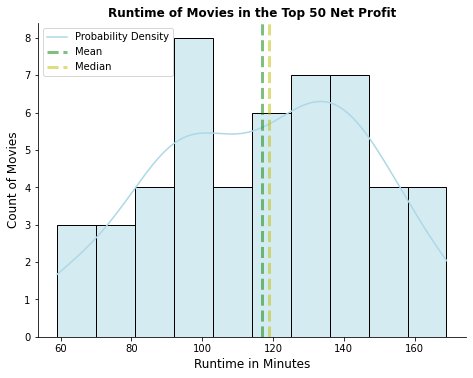

In [31]:
# Data model to determine the best recommended runtime

# Set data model to just include top 50 producing movies since I only want to look at the most successful
# movies to help answer business question
variable = df_mean_runtime.head(50)

# Use a displot to look at the distribution of runtimes
# include a kde line, which shows the density of the data distribution and helps visualize and predict where the most
# sucessful movies runtimes are
sns.displot(data=variable, x="runtime_minutes",  kde=True, legend=True, 
            height=5.1, aspect=1.3, color='lightblue', bins=10)
# Label axis & title
plt.xlabel("Runtime in Minutes", size=12)
plt.ylabel("Count of Movies", size=12)
plt.title("Runtime of Movies in the Top 50 Net Profit", weight='bold', size=12)

# add a mean and median line to the plot, the mean and median value is what I will recommend the movie runtime to be
plt.axvline(x=variable.runtime_minutes.mean(), ls='--', linewidth=3, color='g', label="mean", alpha=0.5)
plt.axvline(x=variable.runtime_minutes.median(), ls='--', linewidth=3, color='y', label="median", alpha=0.5)
plt.legend(['Probability Density', "Mean", "Median"])

# Plot shows that even though the highest count of sucessful movies lasted between 90-110 mins, there is greater 
# chance of sucess above 110 minutes. This is shown in the kde, mean, and median

plt.savefig("./images/runtime_displot.png", dpi=150)

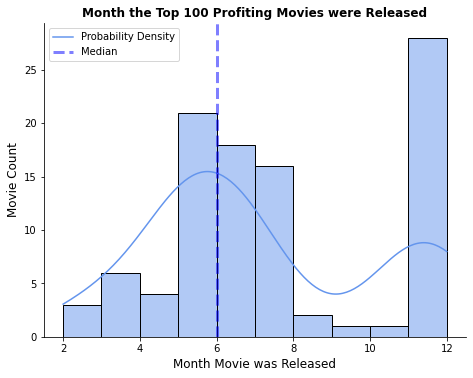

In [32]:
# Data model to determine the best recommended release month

# Set data model to just include top 100 producing movies since I only want to look at the most successful
# movies to help answer business question. 
variable2 = df_net_profit.head(100)

# include a kde line, which shows the density of the data distribution and helps visualize and locate where the most
# sucessful movies' release months are
sns.displot(data=variable2, x="release_month", legend=True, 
            height=5.1, aspect=1.3, color='cornflowerblue',  kde=True, bins=10)

# Label axis & title
plt.xlabel("Month Movie was Released", size=12)
plt.ylabel("Movie Count", size=12)
plt.title("Month the Top 100 Profiting Movies were Released", weight='bold', size=12)

# add a median line to the plot, median value is what I will recommend the movie runtime to be
plt.axvline(x=variable2.release_month.median(), ls='--', linewidth=3, color='b', label="median", alpha=0.5)
plt.legend(['Probability Density', "Median"])

# Shows that even though the count of top producing movies as highest in december, overall there
# are more movies that do better in June
plt.savefig("./images/release_month_top_100.png", dpi=150)

In [33]:
# Closer look at top 50 movies to confirm that June is a good time to release the movie
df_styled = (mean_profit_by_month.style
   .highlight_max(['Number of Movies'])
   .hide_index()
   .set_caption("Mean of Net Profit by Release Month for the Top 50 Movies")
   .set_precision(2))
df_styled

release_month,Number of Movies,Mean of Net Profits ($)
2,1,1148258224.00
3,4,935545495.50
4,4,1212389452.00
5,7,984613389.14
6,11,977272112.36
7,9,895498823.44
11,5,911692281.40
12,9,1300575924.00


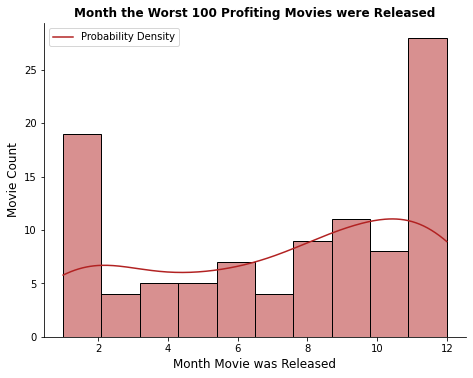

In [34]:
# Data model to determine the WORST release month
# It is important to also view the worst release month because this better narrow downs when to release the movie, 
# there only being 12 months in the year there is less room for error than the other characteristics.
variable3 = df_net_profit.tail(100)

# include a kde line, which shows the density of the data distribution and helps visualize and locate what the least
# sucessful movies' release months are
sns.displot(data=variable3, x="release_month", kde=True, legend=True, 
            height=5.1, aspect=1.3, color='firebrick', bins=10)
plt.xlabel("Month Movie was Released", size=12)
plt.ylabel("Movie Count", size=12)
plt.title("Month the Worst 100 Profiting Movies were Released", weight='bold', size=12)

plt.legend(['Probability Density'])
plt.savefig("./images/month_worst_profit.png", dpi=150)

# this table compliments the top 100 movies' release date plot becuase the worst movies' kde line is inverse of the 
# best movies' kde line

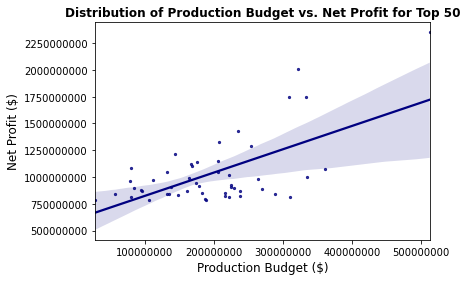

In [35]:
''' 
I chose to use a regplot because it can help predict the profit based on budget. I Only used top 50 net profit movies 
in the first plot so I can show a closer look at what the budget range is for the most sucessful. I also included a 
regplot for the top 100 movies so the client can also see what the predicted profits would be fora lower budget 
movie.
'''
# Data model to show how production budget can aid in determining a movie's successful

sns.regplot(x="adjusted_production_budget", y="net_profit", data=df_net_profit.head(50), scatter_kws={'s':5},
            color='navy')
plt.xlabel("Production Budget ($)", size=12)
plt.ylabel("Net Profit ($)", size=12)
plt.title("Distribution of Production Budget vs. Net Profit for Top 50", weight='bold', size=12)
plt.ticklabel_format(style='plain')
plt.savefig("./images/budget_vs_profit_50.png", dpi=150)

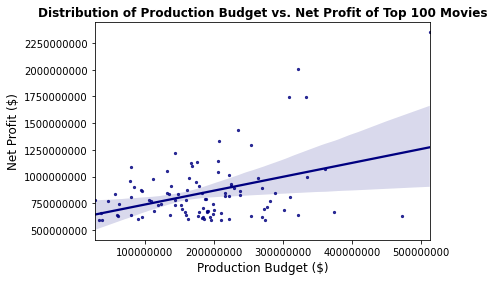

In [36]:
# when including more data the line of regretion shows a lower prediction for the net profit 
# this plot suggests that there are more characterists to making a successful movie than just budget
sns.regplot(x="adjusted_production_budget", y="net_profit", data=df_net_profit.head(100), scatter_kws={'s':5},
            color='navy')
plt.xlabel("Production Budget ($)", size=12)
plt.ylabel("Net Profit ($)", size=12)
plt.title("Distribution of Production Budget vs. Net Profit of Top 100 Movies", weight='bold', size=12)
plt.ticklabel_format(style='plain')
plt.savefig("./images/budget_vs_profit_100.png", dpi=150)

## Evaluation

The data investigation led to findings on common trends the most successful movies have. Pinpointing these trends can help Microsoft make educated decisions on their movie's characteristics: runtime, release month, and budget. The recommendations were ultimately found by interpreting the median values for each specific characteristic for the top 50 movies.
 

## Conclusions

This analysis used net profit as the measurement of success for a movie. After evaluating net profit in comparison to runtime, release month, and runtime this analysis has led to three recommendations: 
- The movie should last approximately 117 to 119 minutes
- The movie should be released in June
- It is expected the higher the production budget the higher the net profit will be. I recommend Microsoft spend around $188,000,000 which is the median production budget of the top 50 movies. 

The analysis completed could be further improved by looking deeper into the production budget. Further analysis into budget will allow the client to get more detailed advice to which will help guarantee their movies success. For example, budget put towards special effects or marketing might have a greater impact than the budget spent on the talent/actors and these aspects would be a good starting point for further investigation.

Other analysis that could been completed that would have further answer the business problem would be on the movie genres. An analysis on genre can show insight on if specific genres lead to higher net profiting movies.